In [1]:
import pandas as pd
import geopandas as gpd
import tempun
import matplotlib.pyplot as plt

In [66]:
# global parameters for plots
plt.style.use("fast")
plt.rcParams['figure.dpi'] = 600
plt.rcParams['figure.figsize'] = (4.45, 3)
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".tiff", dpi=600)
    fig.savefig("../figures/" + fig_name + ".png", dpi=600)

In [3]:
GIST = gpd.read_parquet("../data/large_files/GIST_geocontexts.parquet")
GIST = GIST[GIST["random_dates"].notnull()]
GIST["random_dates"] = GIST["random_dates"].apply(list)
len(GIST)

106898

In [4]:
pottery = pd.read_csv("../data/large_files/Pottery.tsv",  sep='\t')
pottery.head()

/var/folders/zg/zvg9y3rs7j527jxfq9sc2xqc0000gn/T/ipykernel_89014/2813747642.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  pottery = pd.read_csv("../data/large_files/Pottery.tsv",  sep='\t')


,URI,Vase Number,Fabric,Technique,Sub Technique,Shape Name,Provenance,Date,Inscriptions,Attributed To,...,Inscriptions II,Measurements,Volume,Weight,Restorations,Ornament,Technical Observations,Pleiades URI,Latitude,Longitude
0,"<a href=""javascript:return(false);"" onclick=""w...",1.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",-525 to -475,NaN,CHIUSI P by KUNZE-GOTTE | LEAGROS GROUP by KUN...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<a href=""javascript:return(false);"" onclick=""w...",42.421429,11.702499
1,"<a href=""javascript:return(false);"" onclick=""w...",2.0,ATHENIAN,BLACK-FIGURE,NaN,"KRATER, COLUMN FRAGMENT","GREECE, ATHENS, AGORA",-550 to -500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"<a href=""javascript:return(false);"" onclick=""w...",3.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",-550 to -500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<a href=""javascript:return(false);"" onclick=""w...",42.421429,11.702499
3,"<a href=""javascript:return(false);"" onclick=""w...",4.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK",NaN,-550 to -500,NaN,<em>Near</em> MEDEA GROUP by UNKNOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"<a href=""javascript:return(false);"" onclick=""w...",5.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK",NaN,-525 to -475,NaN,ANTIMENEAN by KUNZE-GOTTE | DAYBREAK P by POUI...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def split_date(date_string, n):
    try:
        date_string = date_string.partition(" to ")[n]
    except:
        pass
    try:
        date_string = int(date_string)
    except:
        pass
    return date_string
pottery["not_before"] = pottery["Date"].apply(lambda x: split_date(x, 0))
pottery["not_after"] = pottery["Date"].apply(lambda x: split_date(x, 2))

(-1300, 1.2),
(-1200, 1.2),
(-1100, 0.8),
(-1000, 0.4),



In [17]:
development_index = pd.read_csv("../data/ober_development-index.csv")
development_index

,year,DI
0,-1300,1.2
1,-1200,1.2
2,-1100,0.8
3,-1000,0.4
4,-900,0.6
5,-800,0.9
6,-700,1.7
7,-600,3.3
8,-500,5.2
9,-400,7.5


In [13]:
pottery["random_dates"] = pottery.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=100, antepost=True), axis=1)

[[<matplotlib.patches.Polygon at 0x2d38bad30>],

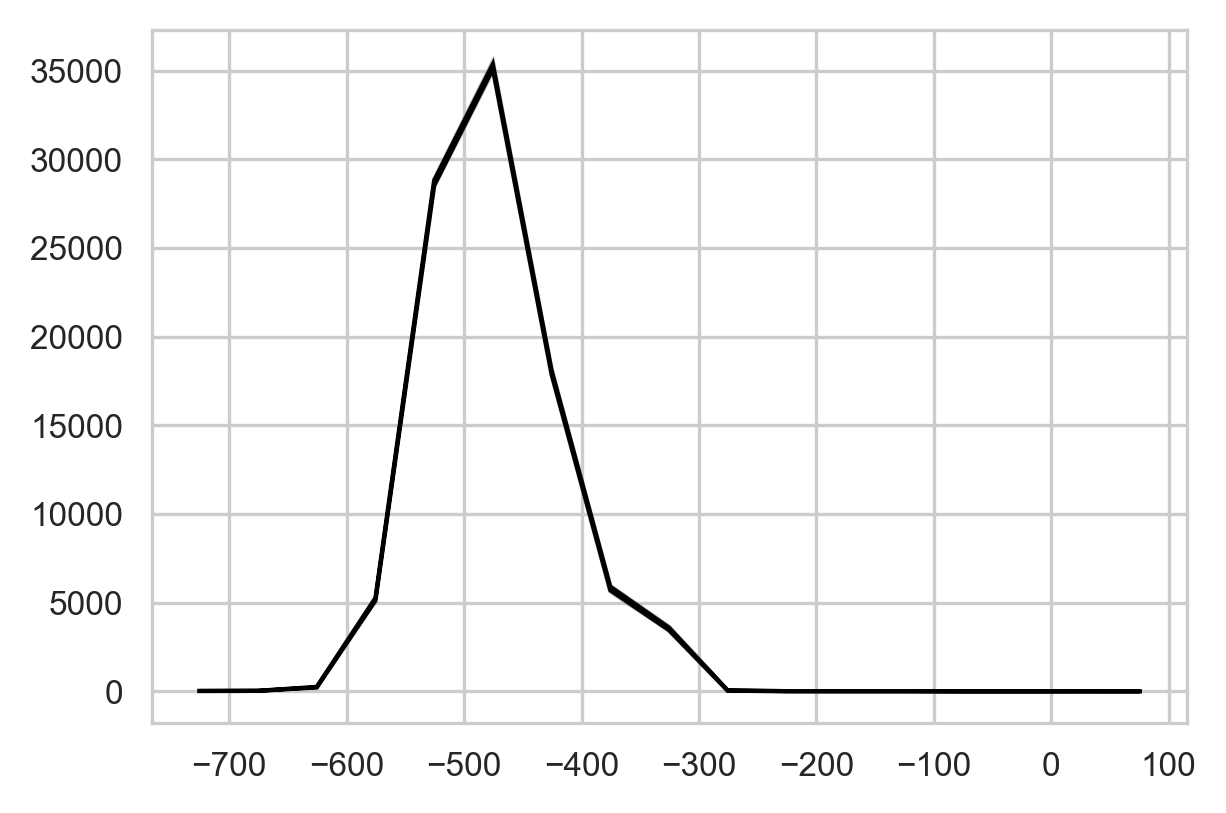

In [9]:
tempun.timeblocksplot_from_randoms(pottery["random_dates"], random_size=100, bins=[-700, -300, 25] )

(-650.0, -250.0)

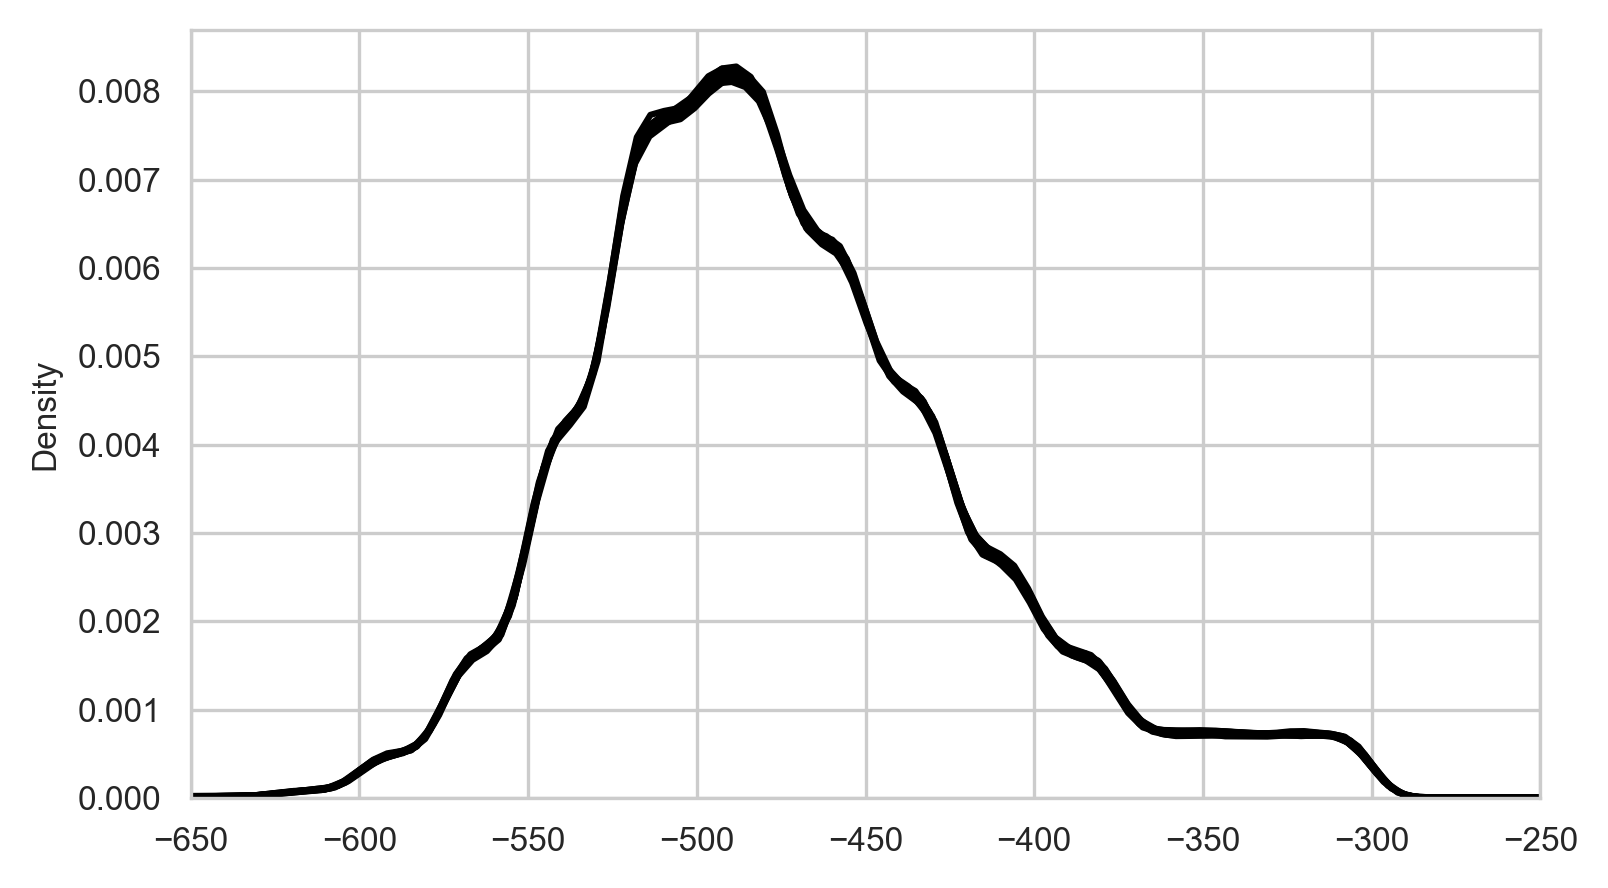

In [10]:
fig, ax = plt.subplots(1,1, tight_layout=True)
tempun.kdeplot_from_randoms(pottery["random_dates"], random_size=10, ax=ax)
ax.set_xlim(-650,-250)

(-650.0, -250.0)

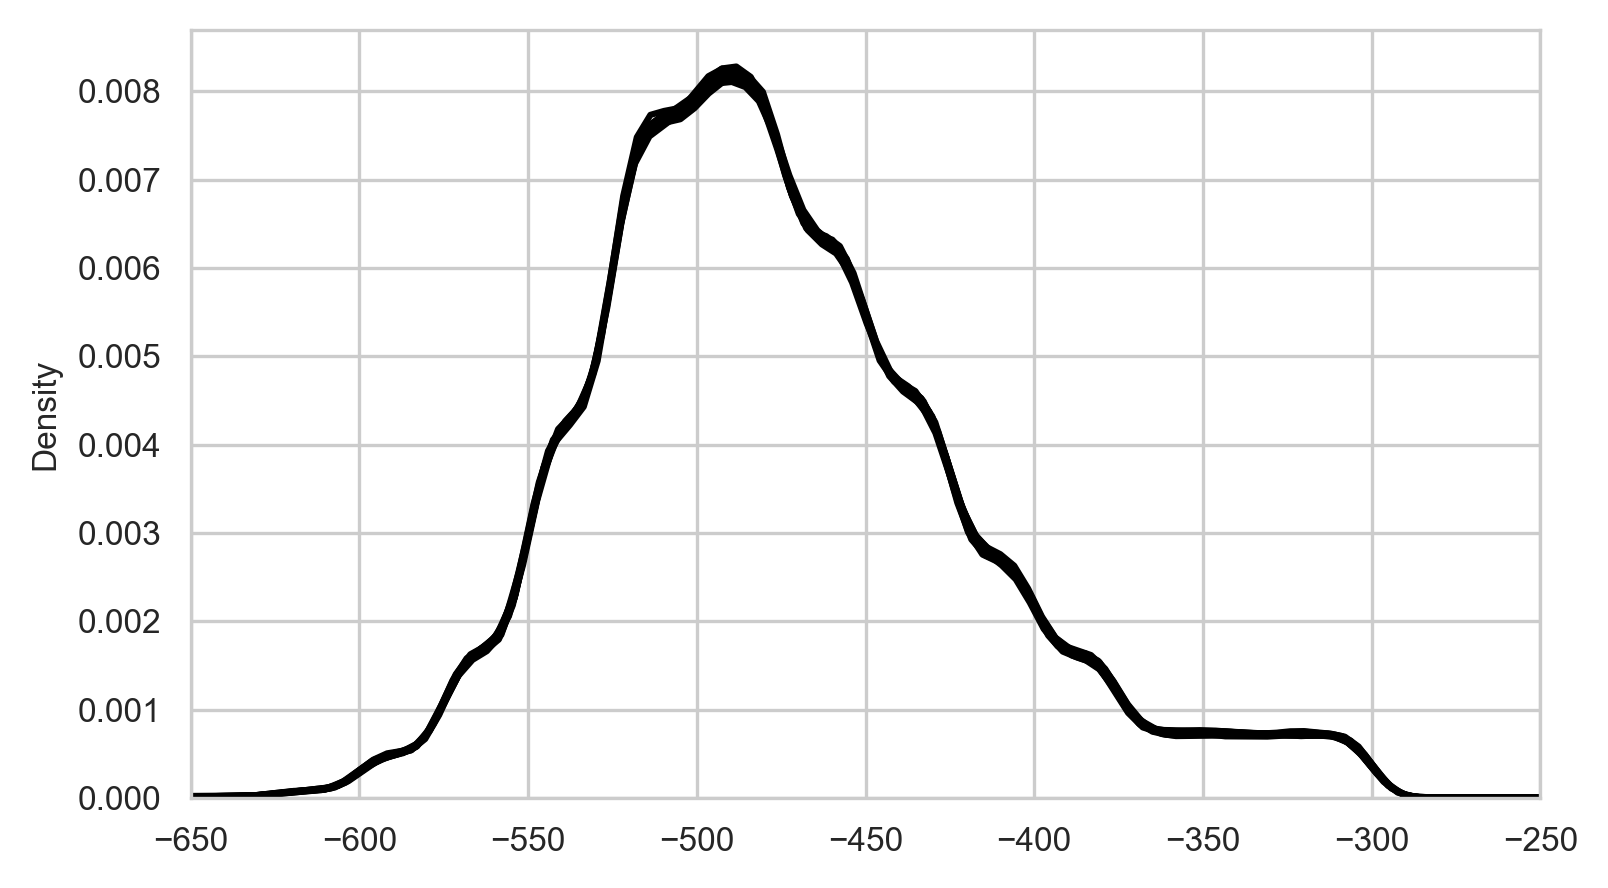

In [11]:
fig, ax = plt.subplots(1,1, tight_layout=True)
tempun.kdeplot_from_randoms(pottery["random_dates"], random_size=10, ax=ax)
ax.set_xlim(-650,-250)

In [18]:
len(pottery[pottery["Provenance"].str.contains("GREECE", na=False)])

22051

In [ ]:
len(pottery[pottery["Provenance"].str.contains("GREECE", na=False)])

In [21]:
len(pottery[pottery["Fabric"].str.contains("ATHENIAN", na=False)])

103967

(-650.0, -250.0)

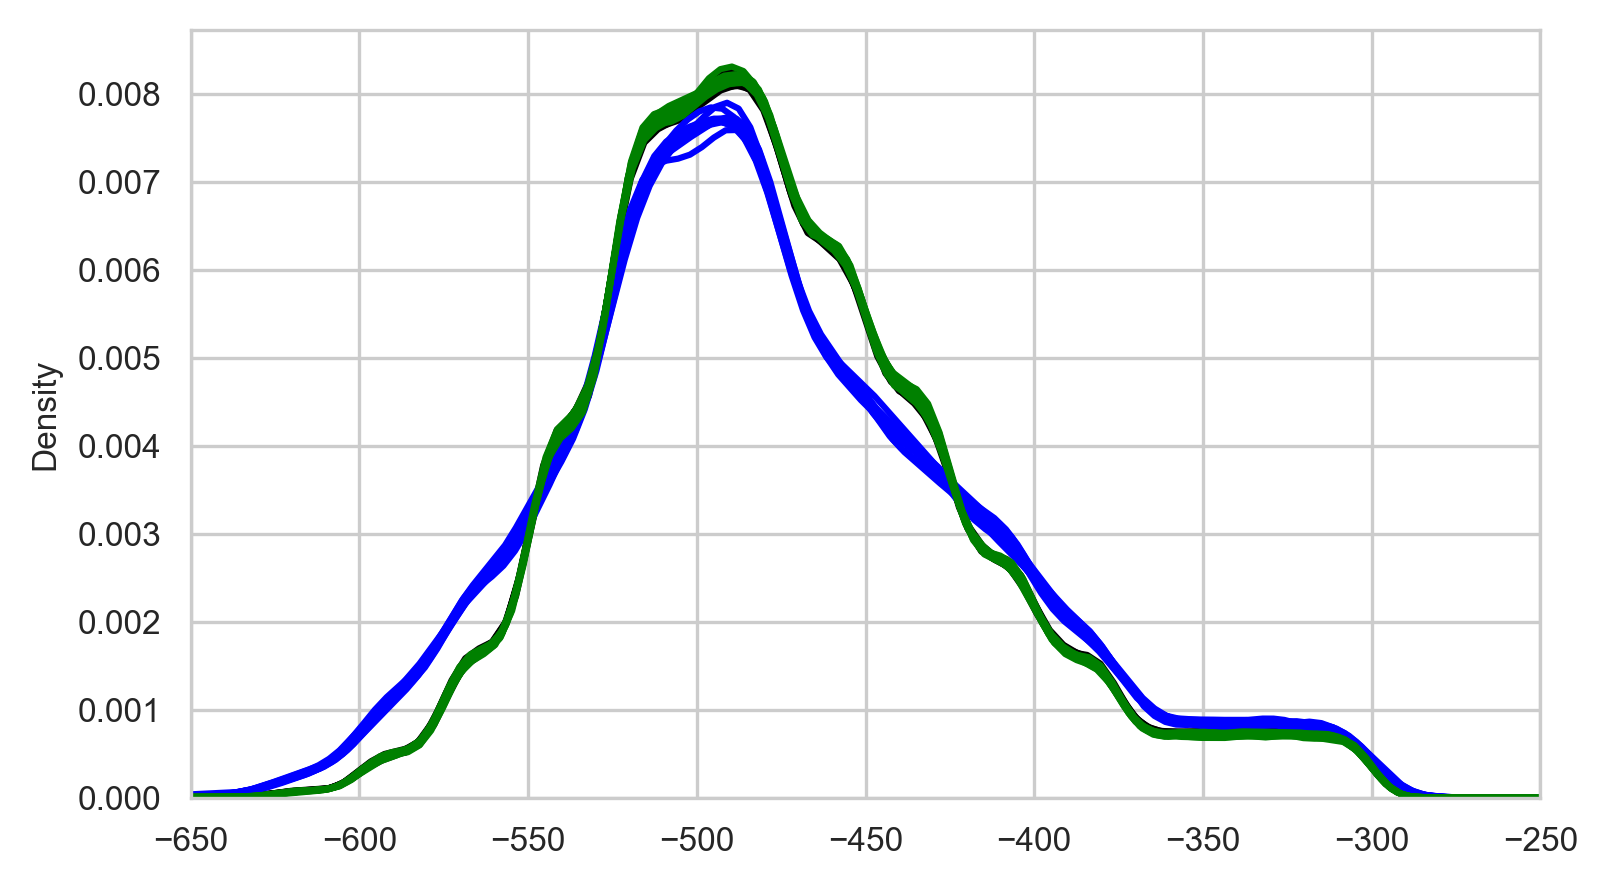

In [32]:
fig, ax = plt.subplots(1,1, figsize=(5.4, 3), tight_layout=True)
tempun.kdeplot_from_randoms(pottery["random_dates"], random_size=10, ax=ax, color="black")
tempun.kdeplot_from_randoms(pottery[pottery["Provenance"].str.contains("GREECE", na=False)]["random_dates"], random_size=10, ax=ax, color="blue")
tempun.kdeplot_from_randoms(pottery[pottery["Fabric"].str.contains("ATHENIAN", na=False)]["random_dates"], random_size=10, ax=ax, color="green")
ax.set_xlim(-650,-250)

(-800.0, 600.0)

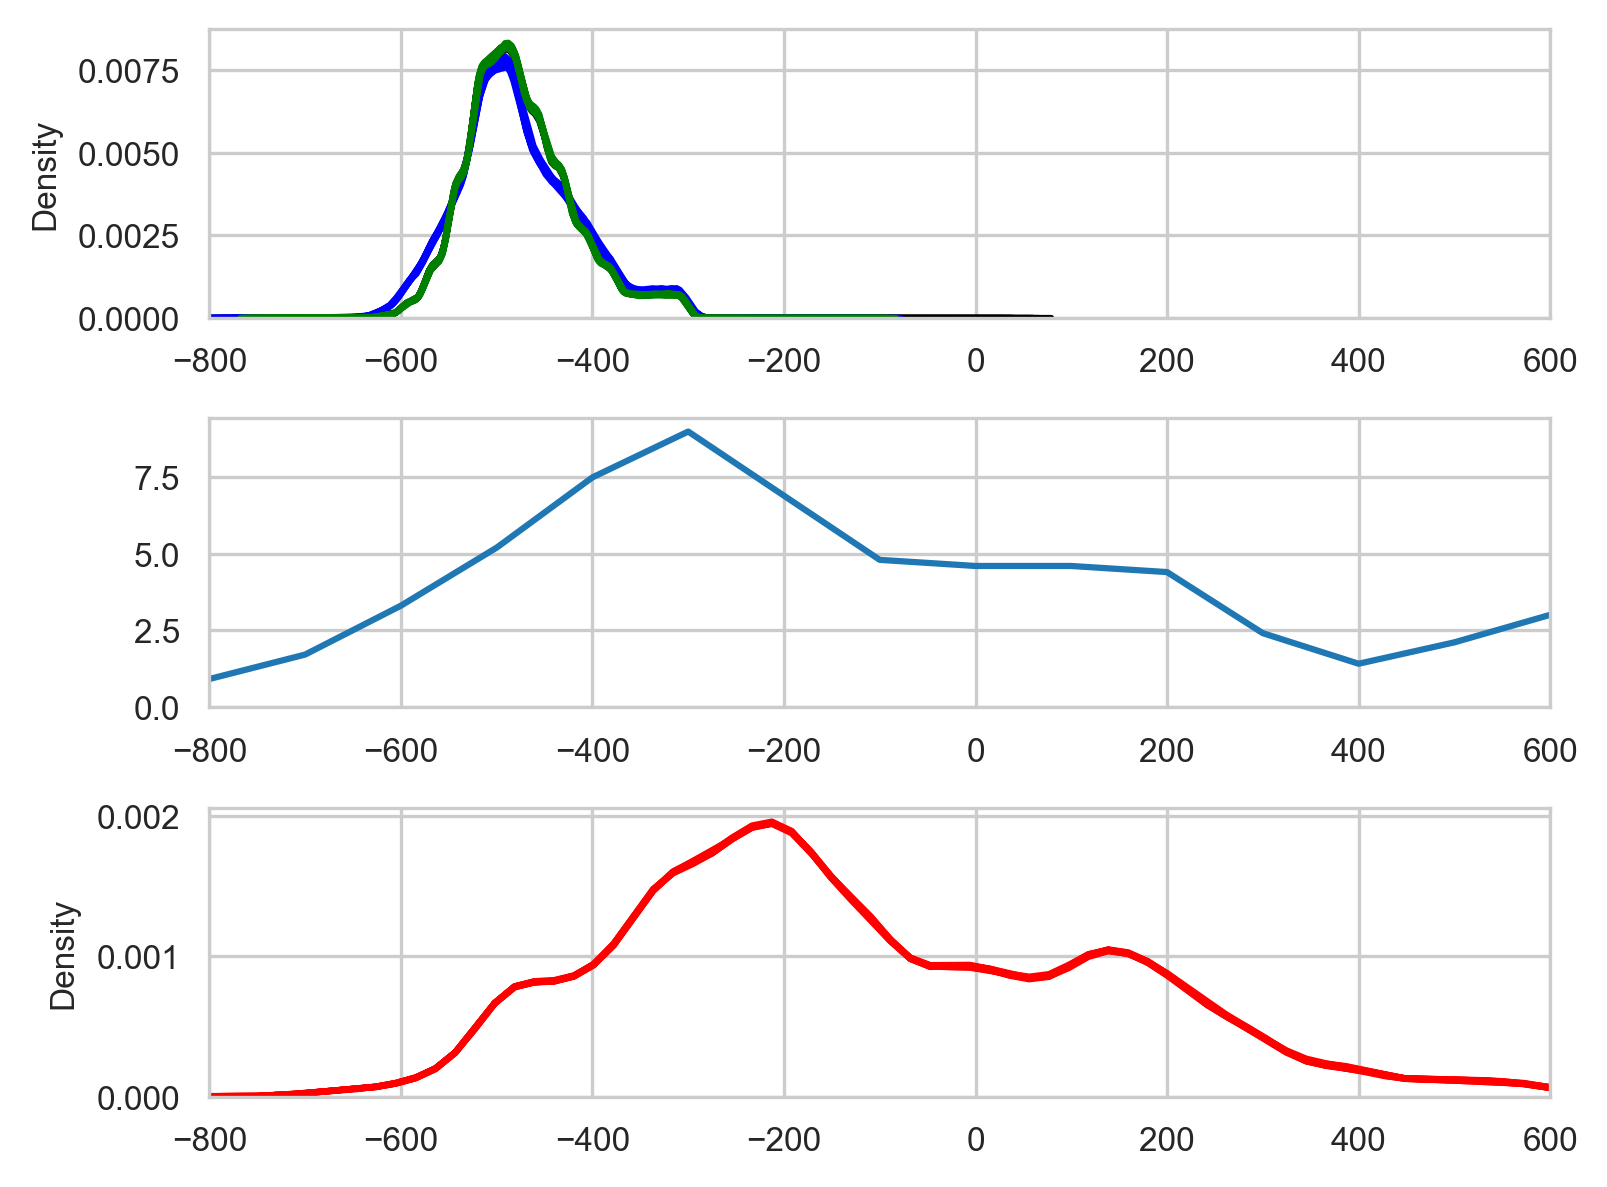

In [18]:
fig, [ax1, ax2, ax3] = plt.subplots(3,1, figsize=(5.4, 4), tight_layout=True)
tempun.kdeplot_from_randoms(pottery["random_dates"], random_size=10, ax=ax1, color="black")
tempun.kdeplot_from_randoms(pottery[pottery["Provenance"].str.contains("GREECE", na=False)]["random_dates"], random_size=10, ax=ax1, color="blue")
tempun.kdeplot_from_randoms(pottery[pottery["Fabric"].str.contains("ATHENIAN", na=False)]["random_dates"], random_size=10, ax=ax1, color="green")
ax1.set_xlim(-800, 600)

ax2.plot(development_index["year"], development_index["DI"])
ax2.set_xlim(-800,600)

#tempun.kdeplot_from_randoms(GIST["random_dates"], random_size=10, ax=ax3, color="green")
tempun.kdeplot_from_randoms(GIST[GIST["greece?"]]["random_dates"], random_size=10, ax=ax3, color="red")
ax3.set_xlim(-800,600)

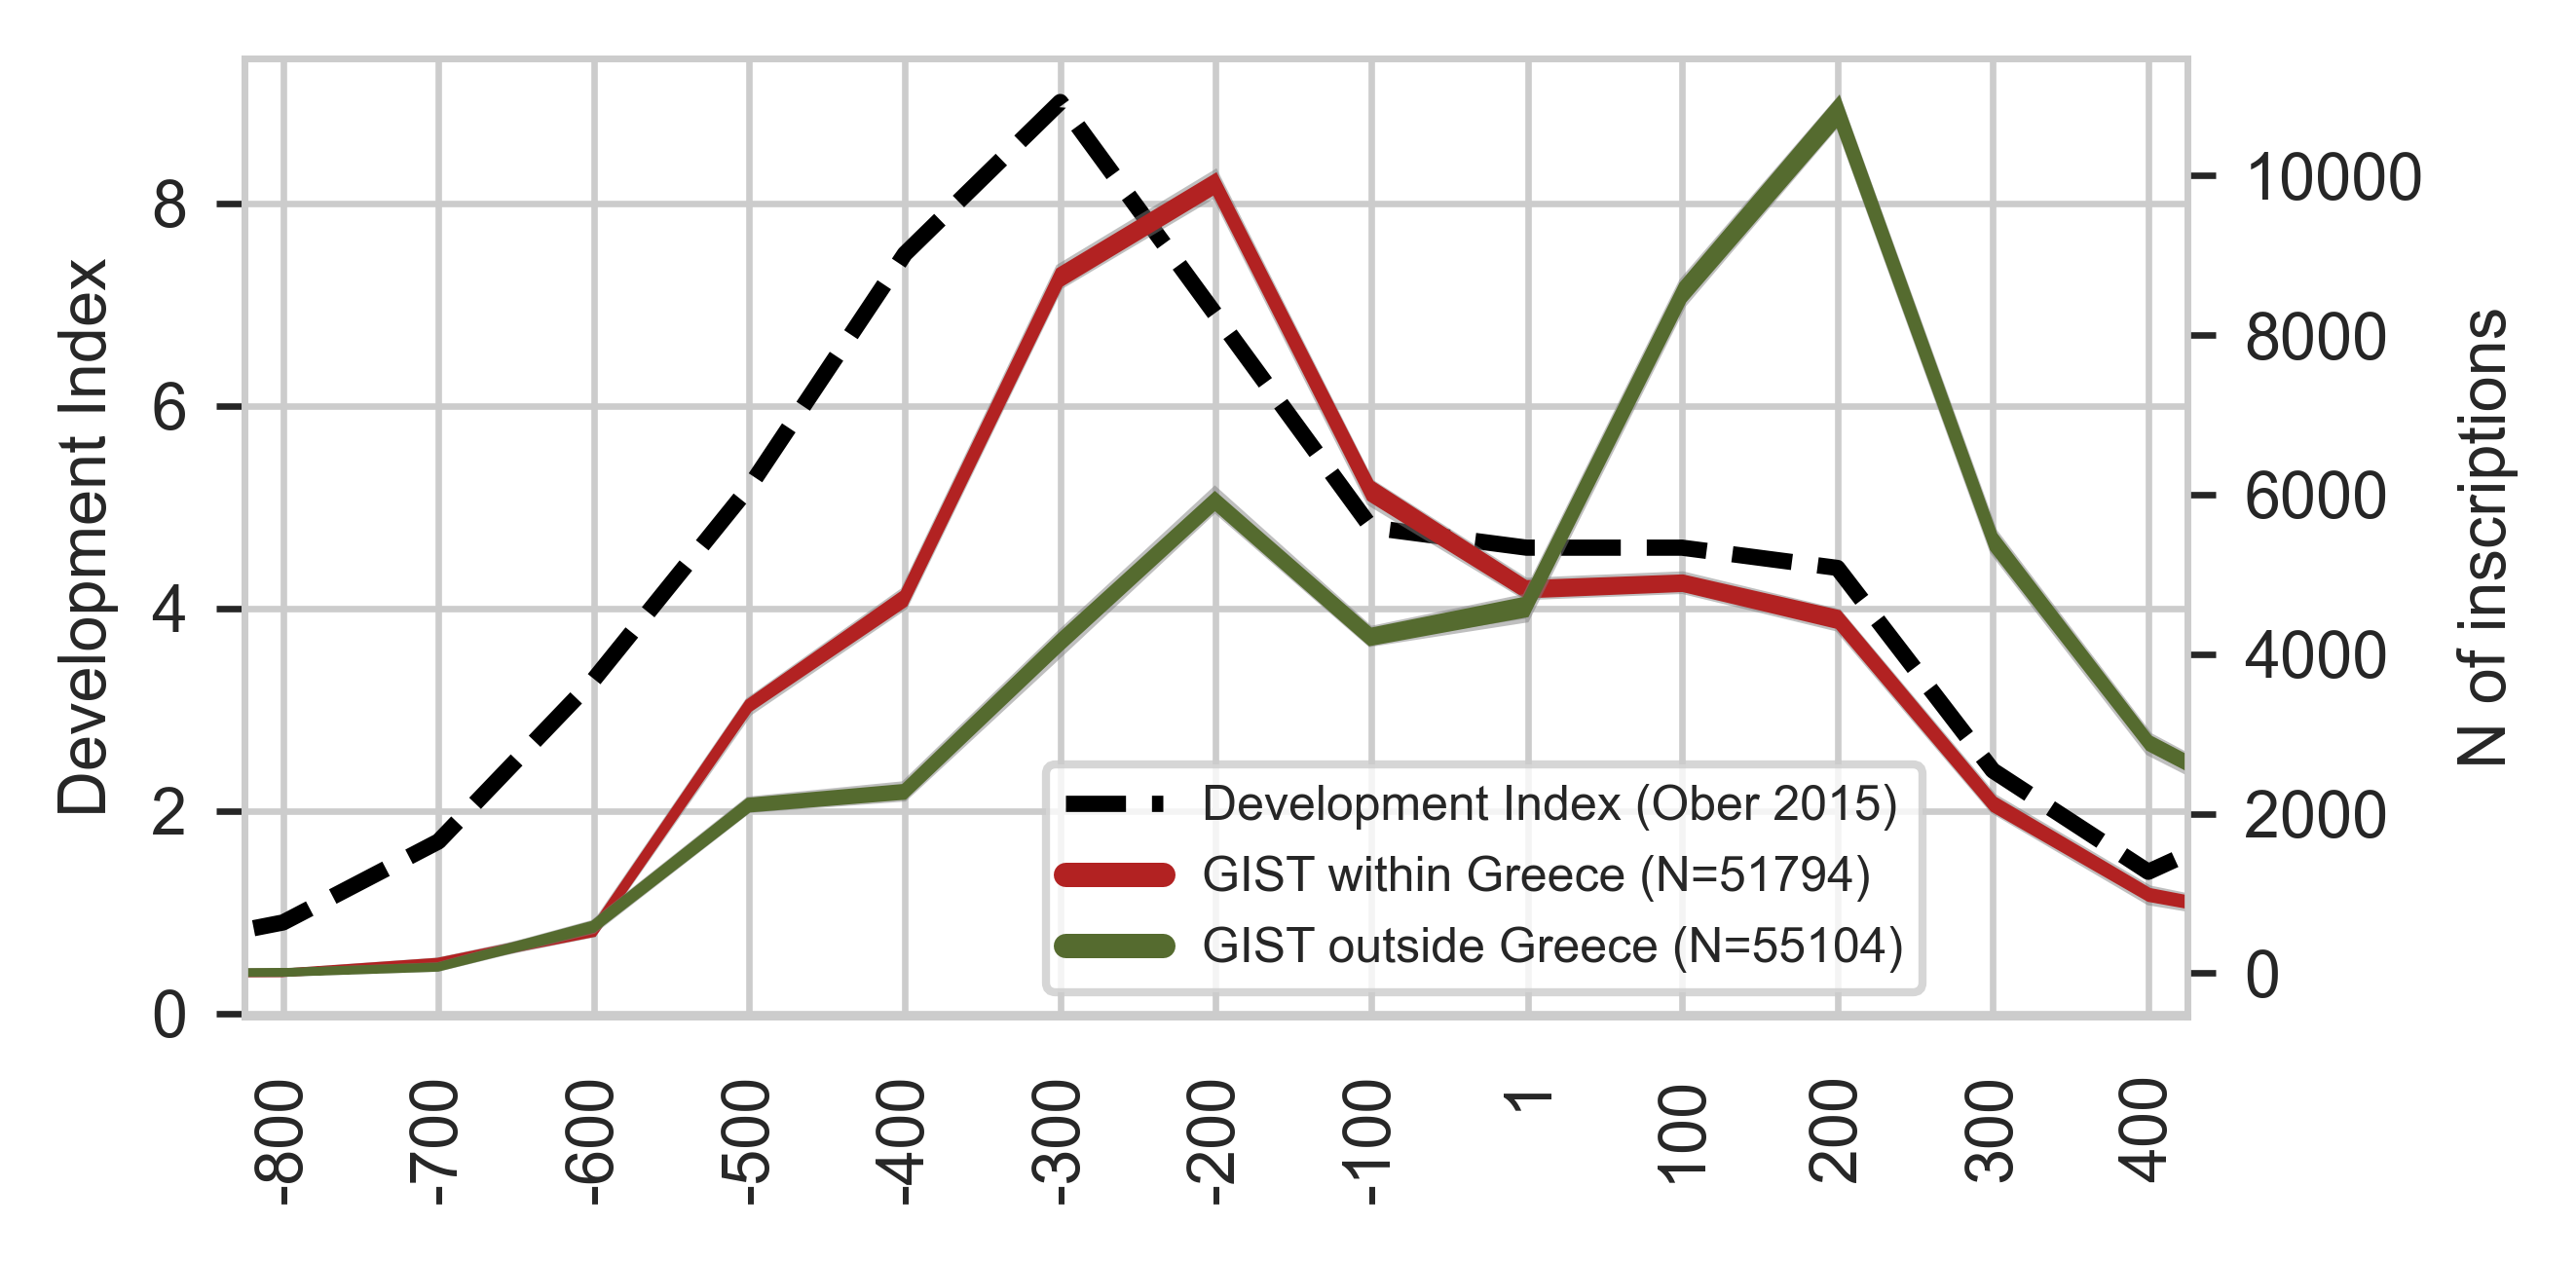

In [65]:
random_size = 100
fig, ax1 = plt.subplots(1,1, figsize=(4.45, 2.2), tight_layout=True)

ax1.plot(development_index["year"], development_index["DI"], color="black", linewidth=2, linestyle="--")
ax1.set_xlim(-825,425)
ax1.set_ylabel("Development Index")

ax2=ax1.twinx()
tempun.timeblocksplot_from_randoms(GIST[GIST["greece?"]]["random_dates"], ax=ax2, color="firebrick", timeblocks=[-950,550,100], random_size=random_size)
tempun.timeblocksplot_from_randoms(GIST[~GIST["greece?"]]["random_dates"], ax=ax2, color="darkolivegreen", timeblocks=[-950,550,100], random_size=random_size)
ax2.set_ylabel("N of inscriptions")

ax1.set_xticks([x+1 if x==0 else x for x in range(-800,500,100)])
ax1.set_xticklabels([str(x+1) if x==0 else str(x) for x in range(-800,500,100)], rotation=90)

#ax2.set_xticklabels(r)
ax2.set_xlim(-825,425)

#ax1.grid(False)
ax2.grid(False)


legend_labels = [
    "Development Index (Ober 2015)",
    "GIST within Greece (N={})".format(str(sum(GIST["greece?"]))),
    "GIST outside Greece (N={})".format(str(sum(~GIST["greece?"])))]
#"all LIST (N={})".format(str(len(LIST)))]
markers = [plt.Line2D([0,0],[0,0],color="black", linestyle="--", lw=2)]

colors=["firebrick", "darkolivegreen"] #, "darkgrey"]
markers += [plt.Line2D([0,0],[0,0],color=color, lw=3) for color in colors]

ax2.legend(markers, legend_labels, numpoints=1, fontsize=6, bbox_to_anchor=(0.4, 0), loc='lower left')

In [68]:
save_figure(fig, "GIST_vs_DI_timeblocks")

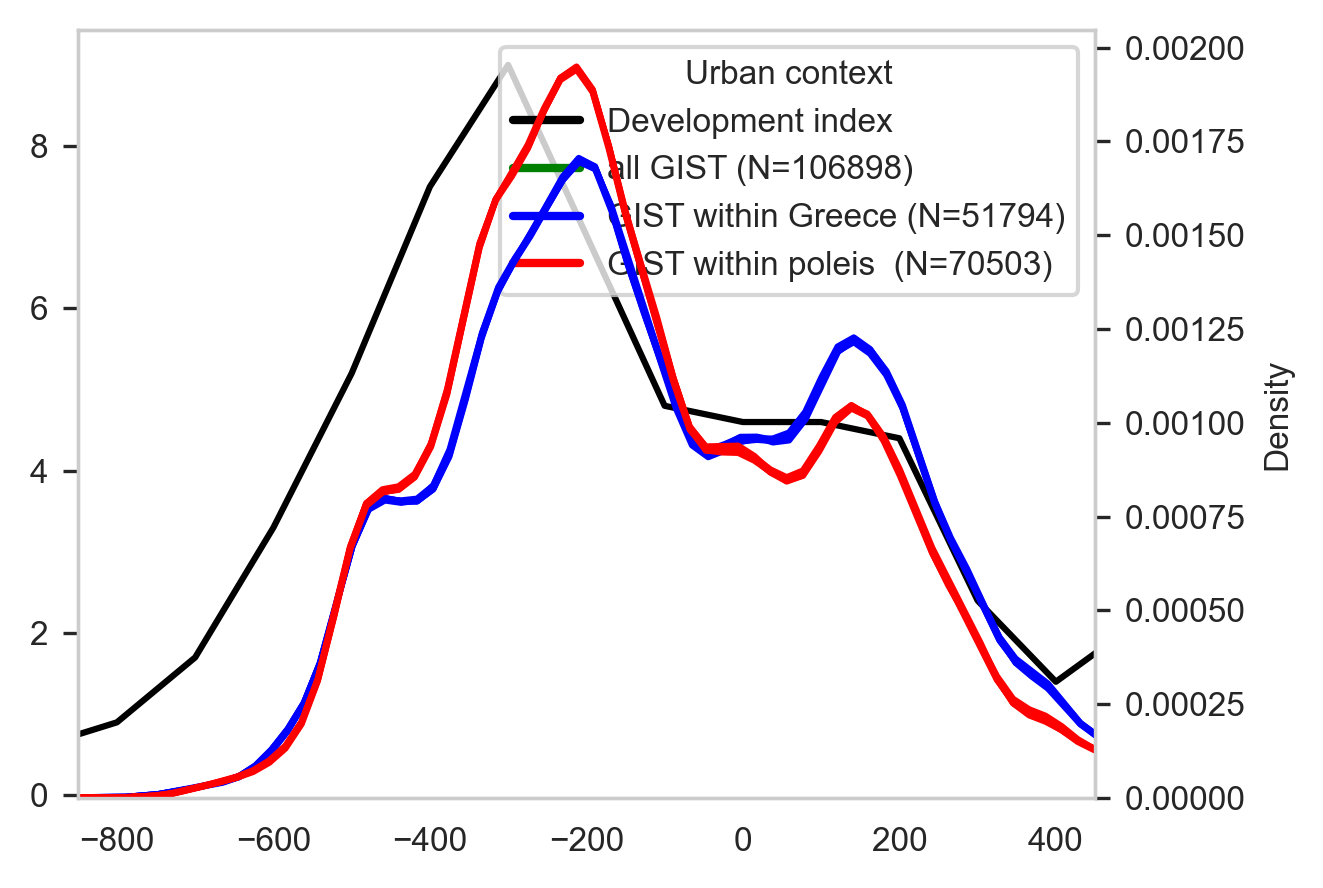

In [29]:
fig, ax1 = plt.subplots(1,1, tight_layout=True)

ax1.plot(development_index["year"], development_index["DI"], color="black")
ax1.set_xlim(-850,450)
ax2=ax1.twinx()
tempun.timeblocksplot_from_randoms(GIST["random_dates"], bins=[range(-850,450,100), ax=ax2, color="green")
tempun.kdeplot_from_randoms(GIST[GIST["polis?"]]["random_dates"], random_size=5, ax=ax2, color="blue")
tempun.kdeplot_from_randoms(GIST[GIST["greece?"]]["random_dates"], random_size=5, ax=ax2, color="red")

ax2.set_xlim(-850,450)

colors=["black", "green", "blue", "red"] #, "darkgrey"]

ax1.grid(False)
ax2.grid(False)


legend_labels = ["Development index",
                 "all GIST (N={})".format(str(len(GIST))),
                 "GIST within Greece (N={})".format(str(GIST["greece?"].sum())),
                 "GIST within poleis  (N={})".format(str(GIST["polis?"].sum()))
                 ]
markers = [plt.Line2D([0,0],[0,0],color=color, lw=2) for color in colors]
ax1.legend(markers, legend_labels, numpoints=1,  fontsize=8, title="Urban context", bbox_to_anchor=(1, 1), loc='upper right')

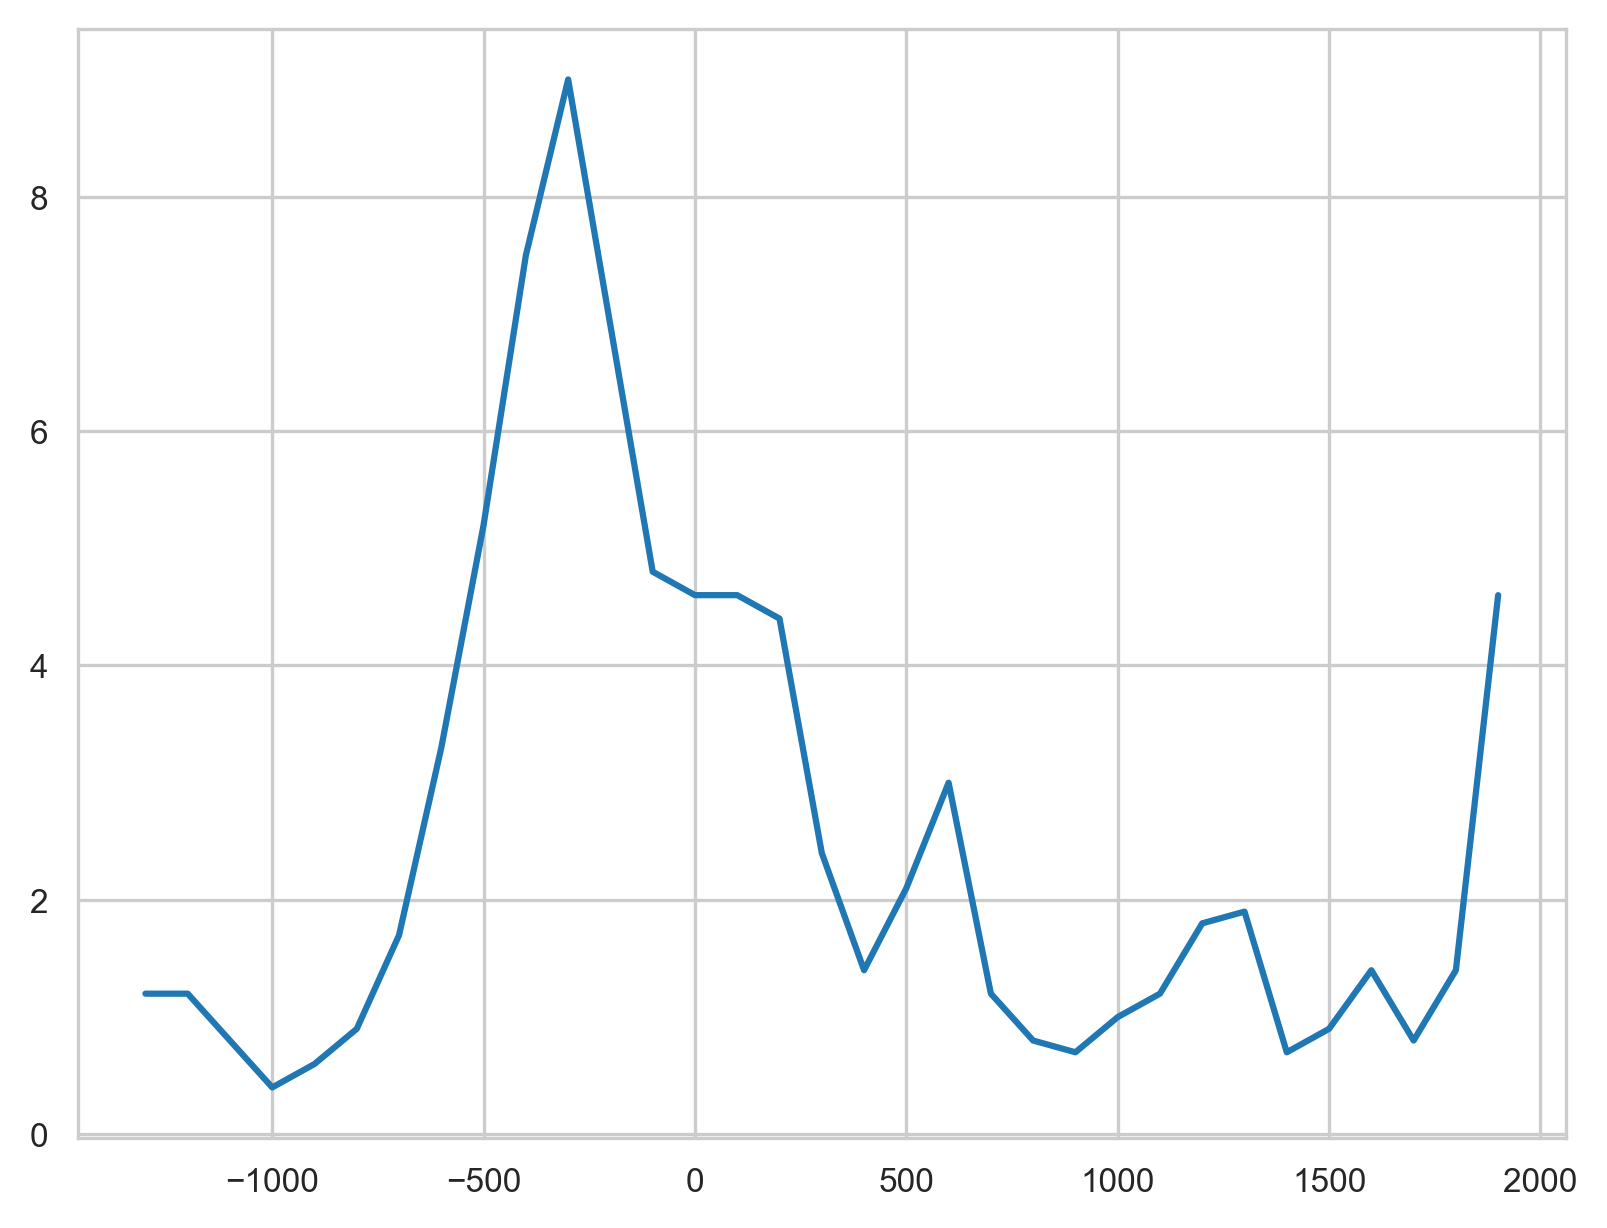

In [31]:
plt.plot(development_index["year"], development_index["DI"])

In [51]:
tempun.timeblocksplot_from_randoms(GIST["random_dates"], random_size=10, ax=ax3, color="red")

[[<matplotlib.patches.Polygon at 0x309492820>],

In [3]:
seshat_2018 = pd.read_csv("../data/seshat_axial_age.csv")

In [5]:
seshat_2018[seshat_2018["NGA"]=="Crete"]

,Date.From,NGA,1. Moralistic punishment,2. Moralizing norms,3. Promotion of prosociality,4. Omniscient supernatural beings,5. Rulers not gods,6. Equating elites and commoners,7. Equating rulers and commoners,8. Formal legal code,9. General applicability of law,10. Constraint on executive,11. Full-time bureaucrats,12. Impeachment,sum
17,-1900,Crete,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,1.0,NaN,1.0
18,-1800,Crete,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,1.0,NaN,1.0
19,-1700,Crete,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,1.0
20,-1600,Crete,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,1.0
21,-1500,Crete,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,1.0
22,-1400,Crete,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,2.0
23,-1300,Crete,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,2.0
24,-1200,Crete,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,2.0
25,-1100,Crete,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,2.0
26,-1000,Crete,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,7.0


In [6]:
seshat_2018.columns

Index(['Date.From', 'NGA', '1. Moralistic punishment', '2. Moralizing norms',
       '3. Promotion of prosociality', '4. Omniscient supernatural beings',
       '5. Rulers not gods', '6. Equating elites and commoners',
       '7. Equating rulers and commoners', '8. Formal legal code',
       '9. General applicability of law', '10. Constraint on executive',
       '11. Full-time bureaucrats', '12. Impeachment', 'sum'],
      dtype='object')